## Contour deformation 

In the context of GW method, contour deformation (CD) technique is used in conjunction with resolution of identity (RI) to reduce the formal scaling of the self-energy calculation. Compared to widely used analytic continuation approach it provides a means to evaluate self-energy  directly on the real axis without employing Pade approximants or non-linear least squares fit and potentially offering superior accuracy. Here, we provide a brief outline of the theory behind CD and give an example of the self-energy calculation within CD without invoking RI in order to facilitate comparison with the results prsented above. 

Detailed discussion of the CD can be found in the following papers:

1. Golze, D., Wilhelm, J., van Setten, M. J., & Rinke, P. (2018). Core-Level Binding Energies from GW : An Efficient Full-Frequency Approach within a Localized Basis. Journal of Chemical Theory and Computation, 14(9), 4856–4869. https://doi.org/10.1021/acs.jctc.8b00458

2. Giantomassi, M., Stankovski, M., Shaltaf, R., Grüning, M., Bruneval, F., Rinke, P., & Rignanese, G.-M. (2011). Electronic properties of interfaces and defects from many-body perturbation theory: Recent developments and applications. Physica Status Solidi (B), 248(2), 275–289. https://doi.org/10.1002/pssb.201046094

CD is used to recast the convolution in the GW expression of self-energy as a difference between two integrals, one which can be performed analytically whereas the other can be evaluated numerically on a relatively small grid. This is achieved by closing the inegration contour as shown below [2]:

![Integration contour used to evaluate $\Sigma(\omega)$](CD_scheme.jpg)

$$
\Sigma(r_1,r_2, \omega) = \frac{i}{2\pi} \int_{-\infty}^{+\infty} e^{i\omega^{\prime} \eta} G(r_1, r_2, \omega + \omega^{\prime}) W(r_1, r_2, \omega^{\prime}) d\omega^{\prime}\\ 
= \frac{i}{2\pi} \oint_{\Gamma} G(r_1, r_2, \omega + z) W(r_1, r_2, z) dz -  \frac{1}{2\pi} \int_{-\infty}^{+\infty} G(r_1, r_2, \omega + i\omega^{\prime}) W(r_1, r_2, i\omega^{\prime}) d\omega^{\prime}
$$

Depending on the $\omega$ value the lower-left and the upper-right loops of the contour can enclose one or several poles of the zero-order Green's function whereas the poles of the screened Coulomb interaction never fall within the contour. This allowes to evaluate the countour integral as a sum of corresponding residues with apropriate signs (note that the upper-right loop is traversed counter-clockwise, while the lower-left loop is traversed clockwise). The imaginary axis contribution is calculated using Gauss-Legendre grid. Importantly, the intgrals over the arches vanish iff the screened Coulomb interaction does not contain the exchange contribution.

In [1]:
import psi4
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.display import display, HTML

display(HTML("<style>.container {width:95% !important;}</style>"))


In [3]:
# GW27 LiH

psi4.set_options({'basis' : 'def2-qzvp', 'd_convergence' : 1e-7,'scf_type' : 'out_of_core', 'dft_spherical_points' : 974, 'dft_radial_points' : 150 })

lih = psi4.geometry("""Li -0.5434056 -0.0000000 0.0000000
                        H  1.0729606 0.0000000 0.0000000
                       symmetry c1
                       units angstrom
""")



psi4.set_output_file('lih_qzvp.out')

scf_e, scf_wfn = psi4.energy('PBE0', return_wfn=True)


print("DFT energy is %16.10f" % scf_e)
epsilon = np.asarray(scf_wfn.epsilon_a())
print(epsilon*psi4.constants.hartree2ev)

DFT energy is    -8.0524115831
[-5.49651374e+01 -5.42430301e+00 -1.11664639e+00  1.31360004e-02
  1.31360004e-02  1.15272797e+00  1.25013665e+00  2.08645249e+00
  2.08645249e+00  3.36627343e+00  4.44255042e+00  4.44255042e+00
  4.55262922e+00  4.55262929e+00  6.55113793e+00  7.06677833e+00
  7.58299813e+00  9.32906039e+00  9.32906039e+00  1.08399803e+01
  1.27226762e+01  1.27226762e+01  1.32503749e+01  1.32503750e+01
  1.32905952e+01  1.32905952e+01  1.68458016e+01  1.79370551e+01
  1.79370551e+01  1.94890438e+01  1.94890474e+01  2.25565132e+01
  2.53600754e+01  2.53600754e+01  3.11763306e+01  3.50648185e+01
  3.82819970e+01  5.70810885e+01  5.70810886e+01  5.99304850e+01
  5.99304850e+01  6.60125036e+01  7.09887404e+01  7.09887404e+01
  8.06844733e+01  1.45033683e+02  1.51547079e+02  1.51547079e+02
  1.61400341e+02  1.61400341e+02  1.61406858e+02  1.61406858e+02
  1.61853636e+02  1.61853636e+02  1.62272570e+02  1.75648810e+02
  2.11325766e+02  2.11325766e+02  2.12557084e+02  2.1880572

In [4]:
import GW

In [7]:
# Analytic calculation for reference purposes
gw_par = {'no_qp' : 2, 'nv_qp' : 1, 'nomega_sigma' : 501, 'step_sigma' : 0.01, 'gl_npoint' : 200, 'low_mem' : True }
gw_lih = GW.GW_DFT(scf_wfn, lih, gw_par)
gw_lih.print_summary()

Number of basis functions:  65
occ/virt: 2/63
Attempting to create RI basis set for DEF2-QZVP (RIFIT)... 
Auxiliary basis set has been generated!
Number of auxiliary basis functions:  157
Fraction of HF exchange is  0.250
Running in production mode!
Shape of the omega_grid_all is  (3, 501)
Caculating GW self-energy via contour deformation
Calculation of the integral term requires    0.080 Gb
Calculation of the residue term requires     0.200 Gb
Using low-memory algorithm
Finished calculating self-energy
Performing one-shot G0W0
SigX - Vxc
[-0.42770924 -0.10311305  0.04793194]
Perfoming graphic solution of the inverse Dyson equation
Done!
E^lin, eV  E^graph, eV  Z 
   -63.081038     -63.514818       0.880685
    -7.652973      -7.517196       0.823266
    -0.100665      -0.104107       0.971727
Graphical solver printout
State 0
E_qp, eV   Z
   -63.514818      0.300839
   -61.128950      0.184851
   -70.676478      0.111760
   -67.784066      0.067686
State 1
E_qp, eV   Z
    -7.517196  

In [5]:
pbe05 = {
    "name": "GOLZE_PBE",
    "x_functionals": {"GGA_X_PBE": {"alpha": 0.5}},
    "x_hf": {"alpha": 0.5},
    "c_functionals": {"GGA_C_PBE": {}}
}

scf_e05, scf_wfn05 = psi4.energy('SCF', return_wfn=True, dft_functional=pbe05)


print("DFT energy is %16.10f" % scf_e05)
epsilon = np.asarray(scf_wfn05.epsilon_a())
print(epsilon*psi4.constants.hartree2ev)

DFT energy is    -8.0584904510
[-59.06744608  -6.53720161  -0.70418008   0.38160771   0.38160771
   1.43575851   1.51677441   2.51679885   2.51679885   3.86942781
   4.96599445   4.96599445   5.04755915   5.04755923   7.12886702
   7.60630679   8.26249279  10.30167098  10.30167098  11.85477629
  13.3789577   13.3789577   13.9104756   13.9104756   13.91932822
  13.91932826  17.50648028  18.91878669  18.91878669  20.38256542
  20.38256831  23.67492338  26.51067363  26.51067363  32.673738
  36.7589016   40.00570055  58.91649512  58.91649522  61.87552963
  61.87552963  68.16762227  73.02771527  73.02771527  82.76963468
 148.6065157  155.56246452 155.56246452 163.88774367 163.88774367
 163.89794876 163.89794877 164.41313111 164.41313111 164.97947255
 179.52236433 214.59400083 214.59400083 215.8588505  221.82309823
 221.82309825 226.92234164 226.92234164 235.54727495 261.7878633 ]


In [7]:
gw_par = {'no_qp' : 2, 'nv_qp' : 1, 'nomega_sigma' : 501, 'step_sigma' : 0.01, 'gl_npoint' : 200, 'low_mem' : True }
gw_lih05 = GW.GW_DFT(scf_wfn05, lih, gw_par)
gw_lih05.print_summary()

Number of basis functions:  65
occ/virt: 2/63
Attempting to create RI basis set for DEF2-QZVP (RIFIT)... 
Auxiliary basis set has been generated!
Number of auxiliary basis functions:  157
Fraction of HF exchange is  0.500
Running in production mode!
Shape of the omega_grid_all is  (3, 501)
Caculating GW self-energy via contour deformation
Calculation of the integral term requires    0.080 Gb
Calculation of the residue term requires     0.200 Gb
Using low-memory algorithm
Finished calculating self-energy
Performing one-shot G0W0
SigX - Vxc
[-0.27491829 -0.0602114   0.02743398]
Perfoming graphic solution of the inverse Dyson equation
Done!
E^lin, eV  E^graph, eV  Z 
   -63.906003     -63.705015       0.906749
    -7.962878      -7.936510       0.872572
    -0.153957      -0.154531       0.984097
Graphical solver printout
State 0
E_qp, eV   Z
   -63.705015      0.444240
   -73.370225      0.043271
   -76.152939      0.038143
   -67.338910      0.016143
State 1
E_qp, eV   Z
    -7.936510  

In [10]:
pbe075 = {
    "name": "GOLZE_PBE",
    "x_functionals": {"GGA_X_PBE": {"alpha": 0.25}},
    "x_hf": {"alpha": 0.75},
    "c_functionals": {"GGA_C_PBE": {}}
}

scf_e075, scf_wfn075 = psi4.energy('SCF', return_wfn=True, dft_functional=pbe075)


print("DFT energy is %16.10f" % scf_e075)
epsilon = np.asarray(scf_wfn075.epsilon_a())
print(epsilon*psi4.constants.hartree2ev)

DFT energy is    -8.0652162060
[-63.19585379  -7.6830777   -0.37335744   0.68064854   0.68064854
   1.68579833   1.7838937    2.94968831   2.94968831   4.33883572
   5.46957129   5.46957129   5.51956353   5.5195636    7.67268839
   8.12737318   8.94787876  11.27790076  11.27790076  12.8365092
  14.00027809  14.00027809  14.51422285  14.51422285  14.57104837
  14.57104837  18.14973349  19.88996214  19.88996214  21.25910748
  21.25910953  24.77831375  27.65342023  27.65342023  34.15675408
  38.46338677  41.72022914  60.75254901  60.7525491   63.81731528
  63.81731528  70.31696025  75.06635108  75.06635108  84.84807439
 152.1626001  159.55429485 159.55429485 166.36963946 166.36963946
 166.39694011 166.39694012 166.99422074 166.99422074 167.66230183
 183.42051838 217.84793199 217.84793199 219.1442838  224.83086881
 224.83086882 229.93947831 229.93947831 238.72869592 267.21848838]


In [11]:
gw_par = {'no_qp' : 2, 'nv_qp' : 1, 'nomega_sigma' : 501, 'step_sigma' : 0.01, 'gl_npoint' : 200, 'low_mem' : True }
gw_lih075 = GW.GW_DFT(scf_wfn075, lih, gw_par)
gw_lih075.print_summary()

Number of basis functions:  65
occ/virt: 2/63
Attempting to create RI basis set for DEF2-QZVP (RIFIT)... 
Auxiliary basis set has been generated!
Number of auxiliary basis functions:  157
Fraction of HF exchange is  0.750
Running in production mode!
Shape of the omega_grid_all is  (3, 501)
Caculating GW self-energy via contour deformation
Calculation of the integral term requires    0.080 Gb
Calculation of the residue term requires     0.200 Gb
Using low-memory algorithm
Finished calculating self-energy
Performing one-shot G0W0
SigX - Vxc
[-0.12113509 -0.01610294  0.0119072 ]
Perfoming graphic solution of the inverse Dyson equation
Done!
E^lin, eV  E^graph, eV  Z 
   -64.469234     -64.460655       0.924735
    -8.131928      -8.128134       0.903478
    -0.184952      -0.185064       0.990717
Graphical solver printout
State 0
E_qp, eV   Z
   -64.460655      0.478092
   -79.272132      0.017544
   -89.368040      0.013530
   -81.945698      0.012469
State 1
E_qp, eV   Z
    -8.128134  

In [12]:
pbe100 = {
    "name": "GOLZE_PBE",
    "x_functionals": {"GGA_X_PBE": {"alpha": 0.0}},
    "x_hf": {"alpha": 1.00},
    "c_functionals": {"GGA_C_PBE": {}}
}

scf_e100, scf_wfn100 = psi4.energy('SCF', return_wfn=True, dft_functional=pbe100)


print("DFT energy is %16.10f" % scf_e100)
epsilon = np.asarray(scf_wfn100.epsilon_a())
print(epsilon*psi4.constants.hartree2ev)

DFT energy is    -8.0725285030
[-6.73486993e+01 -8.85682175e+00 -1.16359246e-01  9.21694394e-01
  9.21694394e-01  1.90862573e+00  2.05071081e+00  3.37722848e+00
  3.37722848e+00  4.77963662e+00  5.95806615e+00  5.95806615e+00
  5.96845123e+00  5.96845130e+00  8.17947408e+00  8.64373340e+00
  9.63229826e+00  1.22556635e+01  1.22556635e+01  1.37859320e+01
  1.45902866e+01  1.45902866e+01  1.51027667e+01  1.51027667e+01
  1.52063778e+01  1.52063778e+01  1.87781201e+01  2.08511937e+01
  2.08511937e+01  2.21215463e+01  2.21215473e+01  2.58710351e+01
  2.87901676e+01  2.87901676e+01  3.56290200e+01  4.01770489e+01
  4.34266504e+01  6.25905787e+01  6.25905787e+01  6.57575758e+01
  6.57575758e+01  7.24625185e+01  7.71062247e+01  7.71062247e+01
  8.69216697e+01  1.55704716e+02  1.63509578e+02  1.63509578e+02
  1.68854702e+02  1.68854702e+02  1.68899404e+02  1.68899404e+02
  1.69612572e+02  1.69612572e+02  1.70328655e+02  1.87338379e+02
  2.21091139e+02  2.21091139e+02  2.22417139e+02  2.2783231

In [13]:
gw_par = {'no_qp' : 2, 'nv_qp' : 1, 'nomega_sigma' : 501, 'step_sigma' : 0.01, 'gl_npoint' : 200, 'low_mem' : True }
gw_lih100 = GW.GW_DFT(scf_wfn100, lih, gw_par)
gw_lih100.print_summary()

Number of basis functions:  65
occ/virt: 2/63
Attempting to create RI basis set for DEF2-QZVP (RIFIT)... 
Auxiliary basis set has been generated!
Number of auxiliary basis functions:  157
Fraction of HF exchange is  1.000
Running in production mode!
Shape of the omega_grid_all is  (3, 501)
Caculating GW self-energy via contour deformation
Calculation of the integral term requires    0.080 Gb
Calculation of the residue term requires     0.200 Gb
Using low-memory algorithm
Finished calculating self-energy
Performing one-shot G0W0
SigX - Vxc
[0.03358392 0.02902174 0.00106758]
Perfoming graphic solution of the inverse Dyson equation
Done!
E^lin, eV  E^graph, eV  Z 
   -64.867663     -64.853089       0.937777
    -8.221841      -8.218413       0.924230
    -0.182160      -0.182182       0.994415
Graphical solver printout
State 0
E_qp, eV   Z
   -64.853089      0.486287
   -87.881809      0.015608
     0.000000     -1.000000
     0.000000     -1.000000
State 1
E_qp, eV   Z
    -8.218413     

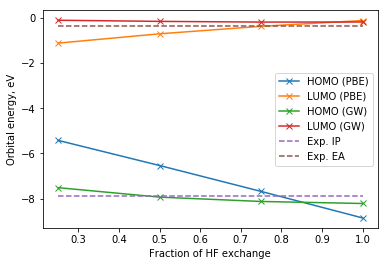

In [17]:
calc_data = [(scf_wfn, gw_lih), (scf_wfn05, gw_lih05), (scf_wfn075, gw_lih075), (scf_wfn100, gw_lih100)]
hf_xc  = np.array([0.25, 0.5, 0.75, 1.0])
homo_dft = []
lumo_dft = []
homo_gw = []
lumo_gw = []

ihomo = 1 # index of HOMO
ilumo = 2 # index of LUMO

for scf, gw in calc_data:
    orb_e = np.asarray(scf.epsilon_a())
    homo_dft.append(orb_e[ihomo]*psi4.constants.hartree2ev)
    lumo_dft.append(orb_e[ilumo]*psi4.constants.hartree2ev)
    orb_e_gw = gw.qp_molgw_graph_
    homo_gw.append(orb_e_gw[ihomo]*psi4.constants.hartree2ev)
    lumo_gw.append(orb_e_gw[ilumo]*psi4.constants.hartree2ev)
    

plt.plot(hf_xc, homo_dft, 'x-', label='HOMO (PBE)')
plt.plot(hf_xc, lumo_dft, 'x-', label='LUMO (PBE)')
plt.plot(hf_xc, homo_gw, 'x-', label='HOMO (GW)')
plt.plot(hf_xc, lumo_gw, 'x-', label='LUMO (GW)')
plt.plot(hf_xc, np.repeat(-7.9, 4), '--', label='Exp. IP' )
plt.plot(hf_xc, np.repeat(-0.342, 4), '--', label='Exp. EA' )

plt.xlabel('Fraction of HF exchange')
plt.ylabel('Orbital energy, eV')

plt.legend()
    

In [6]:
# Impact of freezing the core; fraction of HF exchange = 0.5
gw_par = {'no_qp' : 1, 'nv_qp' : 1, 'nomega_sigma' : 501, 'step_sigma' : 0.01, 'gl_npoint' : 200, 'low_mem' : True, 'nfzc' : 1 }
gw_lih05f = GW.GW_DFT(scf_wfn05, lih, gw_par)
gw_lih05f.print_summary()

Number of basis functions:  64
occ/virt: 1/63
Attempting to create RI basis set for DEF2-QZVP (RIFIT)... 
Auxiliary basis set has been generated!
Number of auxiliary basis functions:  157
Fraction of HF exchange is  0.500
Running in production mode!
Shape of the omega_grid_all is  (2, 501)
Caculating GW self-energy via contour deformation
Calculation of the integral term requires    0.079 Gb
Calculation of the residue term requires     0.199 Gb
Using low-memory algorithm
Finished calculating self-energy
Performing one-shot G0W0
SigX - Vxc
[-0.055294    0.03010167]
Perfoming graphic solution of the inverse Dyson equation
Done!
E^lin, eV  E^graph, eV  Z 
    -7.841789      -7.819266       0.872272
    -0.067582      -0.068307       0.984266
Graphical solver printout
State 0
E_qp, eV   Z
    -7.819266      0.458334
   -15.346402      0.048544
   -12.936566      0.034000
   -27.967335      0.015176
State 1
E_qp, eV   Z
    -0.068307      0.495600
     0.000000     -1.000000
     0.000000  

In [9]:
gap_f = (gw_lih05f.qp_molgw_graph_[1] - gw_lih05f.qp_molgw_graph_[0]) * psi4.constants.hartree2ev
gap = (gw_lih05.qp_molgw_graph_[2] - gw_lih05.qp_molgw_graph_[1]) * psi4.constants.hartree2ev
print("HOMO-LUMO gap (frozen core) %13.6f eV" % (gap_f))
print("HOMO-LUMO gap               %13.6f eV" % (gap))

HOMO-LUMO gap (frozen core)      7.750959 eV
HOMO-LUMO gap                    7.781979 eV


In [10]:
scf_e_hf, scf_wfn_hf = psi4.energy('SCF', return_wfn=True)


print("DFT energy is %16.10f" % scf_e_hf)
epsilon = np.asarray(scf_wfn_hf.epsilon_a())
print(epsilon*psi4.constants.hartree2ev)

DFT energy is    -7.9871049948
[-6.65989394e+01 -8.17424901e+00 -9.81363769e-02  9.42371200e-01
  9.42371200e-01  1.93125166e+00  2.07490528e+00  3.48906014e+00
  3.48906014e+00  4.89277714e+00  6.04361092e+00  6.04361092e+00
  6.16057919e+00  6.16057919e+00  8.29665140e+00  8.72676600e+00
  9.87027195e+00  1.24804528e+01  1.24804528e+01  1.42026774e+01
  1.48130886e+01  1.48130886e+01  1.52642456e+01  1.52642456e+01
  1.54548742e+01  1.54548742e+01  1.89163764e+01  2.12937119e+01
  2.12937119e+01  2.24286059e+01  2.24286059e+01  2.63599600e+01
  2.93775379e+01  2.93775379e+01  3.59722405e+01  4.05629989e+01
  4.40231290e+01  6.33742232e+01  6.33742232e+01  6.64426619e+01
  6.64426619e+01  7.30260154e+01  7.77807783e+01  7.77807783e+01
  8.75998367e+01  1.55207798e+02  1.64482784e+02  1.64482784e+02
  1.69581005e+02  1.69581005e+02  1.69594730e+02  1.69594730e+02
  1.70315174e+02  1.70315174e+02  1.71022863e+02  1.88227180e+02
  2.21371520e+02  2.21371520e+02  2.22661759e+02  2.2836572